In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [33]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime, timedelta

In [34]:
daily_min_temp_data = pd.read_csv('daily-min-temperatures.csv')

In [35]:
daily_min_temp_data

,Date,Temp
0,"January 1, 1981",20.7
1,"January 2, 1981",17.9
2,"January 3, 1981",18.8
3,"January 4, 1981",14.6
4,"January 5, 1981",15.8
...,...,...
3645,"December 27, 1990",14.0
3646,"December 28, 1990",13.6
3647,"December 29, 1990",13.5
3648,"December 30, 1990",15.7


<Figure size 1152x576 with 0 Axes>

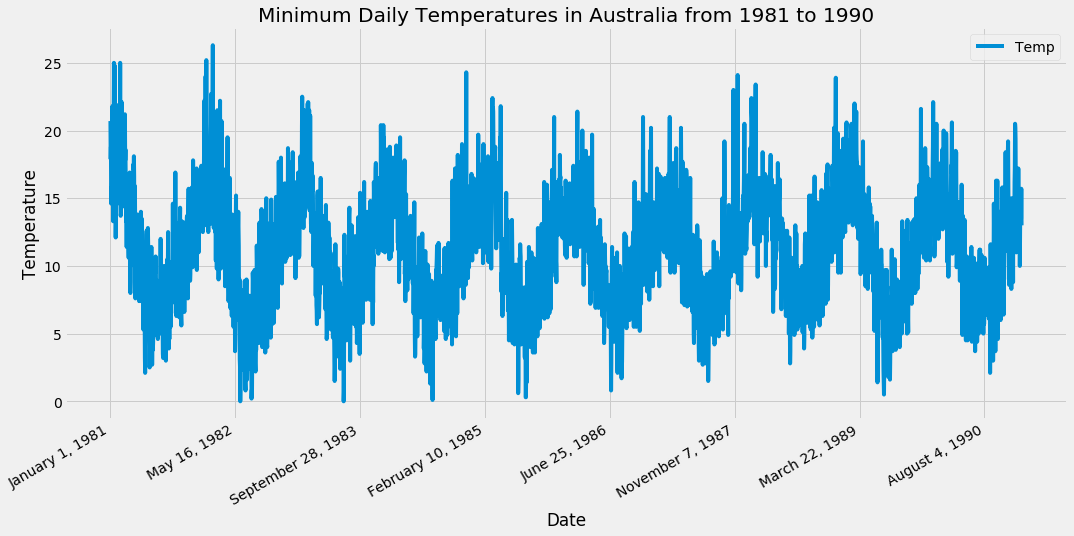

<Figure size 1152x576 with 0 Axes>

In [36]:
daily_min_temp_data.plot(x = 'Date', y = 'Temp', subplots=True, grid=True, figsize=(16,8))
plt.title('Minimum Daily Temperatures in Australia from 1981 to 1990')
plt.ylabel('Temperature')
plt.figure(figsize=(16,8))

In [37]:
daily_min_temp_data.head()

,Date,Temp
0,"January 1, 1981",20.7
1,"January 2, 1981",17.9
2,"January 3, 1981",18.8
3,"January 4, 1981",14.6
4,"January 5, 1981",15.8


In [38]:
daily_min_temp_data['Date']

0         January 1, 1981
1         January 2, 1981
2         January 3, 1981
3         January 4, 1981
4         January 5, 1981
              ...        
3645    December 27, 1990
3646    December 28, 1990
3647    December 29, 1990
3648    December 30, 1990
3649    December 31, 1990
Name: Date, Length: 3650, dtype: object

In [9]:
dates = np.array(daily_min_temp_data['Date'])

In [10]:
dates

array(['January 1, 1981', 'January 2, 1981', 'January 3, 1981', ...,
       'December 29, 1990', 'December 30, 1990', 'December 31, 1990'],
      dtype=object)

In [11]:
daily_min_temp_data.shape

(3650, 2)

In [12]:
data = daily_min_temp_data.filter(['Temp'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2920

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       ...,
       [0.51330798],
       [0.59695817],
       [0.49429658]])

In [14]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train adn y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.78707224, 0.68060837, 0.7148289 , 0.55513308, 0.60076046,
       0.60076046, 0.60076046, 0.66159696, 0.82889734, 0.76045627,
       0.61596958, 0.50570342, 0.63498099, 0.81749049, 0.95057034,
       0.78707224, 0.78326996, 0.94296578, 0.6730038 , 0.58935361,
       0.69201521, 0.46007605, 0.54752852, 0.60836502, 0.62737643,
       0.71102662, 0.73764259, 0.6539924 , 0.58935361, 0.57414449,
       0.58555133, 0.58174905, 0.7148289 , 0.83269962, 0.75665399,
       0.63117871, 0.63878327, 0.55513308, 0.65019011, 0.95057034,
       0.57034221, 0.52091255, 0.52851711, 0.69581749, 0.8365019 ,
       0.84030418, 0.80608365, 0.69961977, 0.63117871, 0.6121673 ,
       0.59695817, 0.63117871, 0.62737643, 0.54752852, 0.54752852,
       0.70342205, 0.64258555, 0.66539924, 0.80608365, 0.67680608])]
[0.7072243346007605]



In [15]:
#Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2860, 60, 1)

In [17]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
2860/2860 [==============================] - 136s 48ms/step - loss: 0.0123


In [20]:
#Create the testing data set
#Create a new array containing scaled values from index ...
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [21]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [22]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [23]:
#Get the models predicted temperatures
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [39]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)** 2)))
rmse

2.452367312298821

C:\Users\Roy\Anaconda3\Scripts\New folder\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


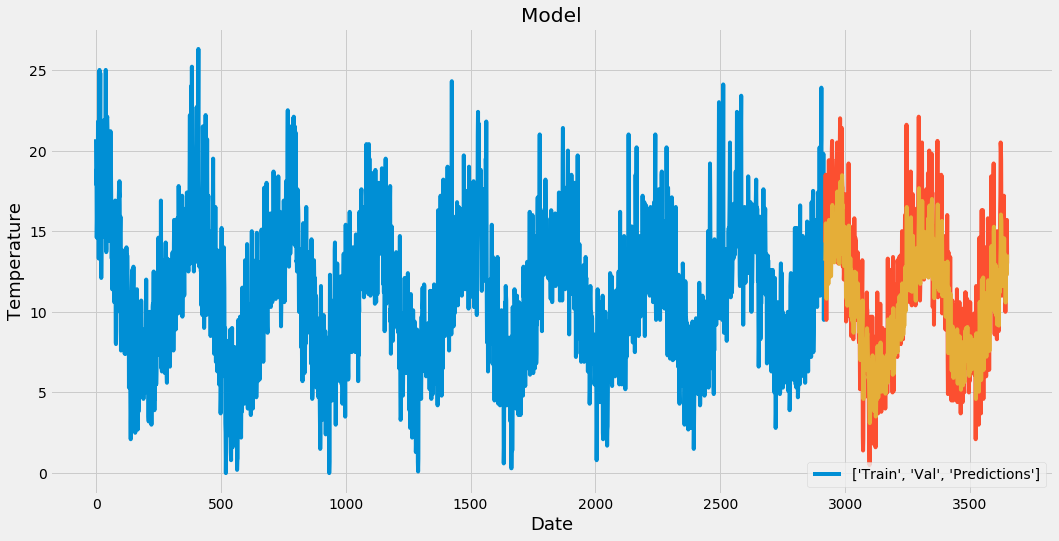

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E037BD42C8>],
      dtype=object)

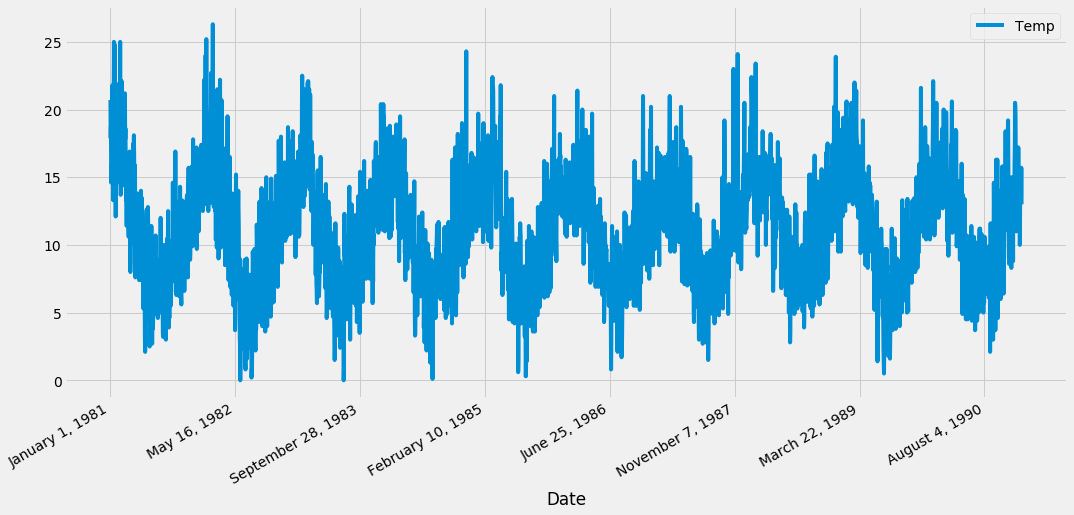

In [40]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
#plt.plot(dates)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.plot(train['Temp'])
plt.plot(valid[['Temp', 'Predictions']])
plt.legend([['Train', 'Val', 'Predictions']], loc='lower right')
plt.show()
daily_min_temp_data.plot(x = 'Date', y = 'Temp', figsize=(16,8), subplots=True, grid=True)

In [41]:
#Show the valid and predicted prices
valid

,Temp,Predictions
2920,14.3,13.165387
2921,17.4,13.265791
2922,18.5,15.008869
2923,16.8,15.488201
2924,11.5,14.477074
...,...,...
3645,14.0,12.972006
3646,13.6,12.563027
3647,13.5,12.364087
3648,15.7,12.310240


In [42]:
#Get the data
daily_min_temp = pd.read_csv('daily-min-temperatures.csv')
daily_min_temp

,Date,Temp
0,"January 1, 1981",20.7
1,"January 2, 1981",17.9
2,"January 3, 1981",18.8
3,"January 4, 1981",14.6
4,"January 5, 1981",15.8
...,...,...
3645,"December 27, 1990",14.0
3646,"December 28, 1990",13.6
3647,"December 29, 1990",13.5
3648,"December 30, 1990",15.7


In [43]:
new_df = daily_min_temp.filter(['Temp'])

In [44]:
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

In [45]:
last_60_days_scaled

array([[0.4486692 ],
       [0.49429658],
       [0.42205323],
       [0.47528517],
       [0.69581749],
       [0.73003802],
       [0.58555133],
       [0.49809886],
       [0.43726236],
       [0.3269962 ],
       [0.47908745],
       [0.52471483],
       [0.55513308],
       [0.50190114],
       [0.46768061],
       [0.33460076],
       [0.40684411],
       [0.37642586],
       [0.31558935],
       [0.57034221],
       [0.46387833],
       [0.39923954],
       [0.42205323],
       [0.49429658],
       [0.4904943 ],
       [0.33460076],
       [0.55893536],
       [0.55893536],
       [0.48288973],
       [0.50570342],
       [0.50190114],
       [0.61596958],
       [0.65779468],
       [0.77946768],
       [0.76806084],
       [0.73764259],
       [0.58935361],
       [0.53612167],
       [0.41825095],
       [0.42205323],
       [0.53231939],
       [0.43346008],
       [0.47528517],
       [0.5095057 ],
       [0.51711027],
       [0.52851711],
       [0.6539924 ],
       [0.558

In [46]:
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)

In [47]:
#Convert the X_test to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_temp = model.predict(X_test)
#Undo the scaling
pred_temp = scaler.inverse_transform(pred_temp)
print(pred_temp)

[[11.951356]]


In [ ]:
new_x_test = []